tau = 2.560s
length of wf = 50.0s
fs = 100.0Hz
Calculating Coherences:


100%|██████████| 100/100 [00:01<00:00, 57.22it/s]


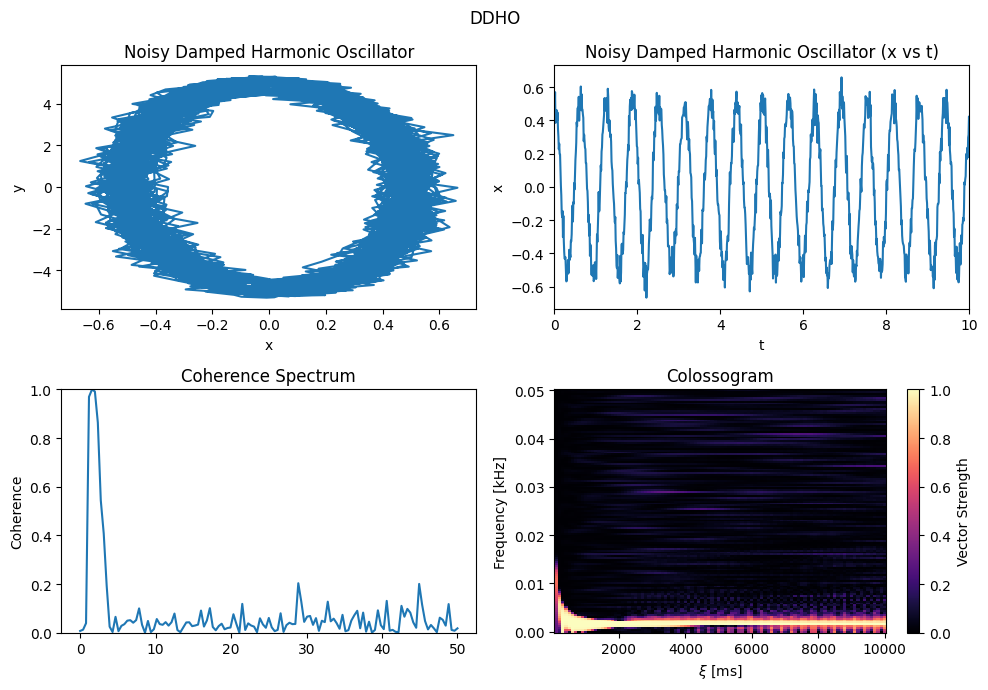

<Figure size 640x480 with 0 Axes>

"\n# ======================================\n# Remark: At this point, we have a position (x) vs. time (t) plot. We take FFT to convert this to the frequency domain\n# -- FFT Implementation + Plot\nxf = np.fft.fft(xvals)\nfreq = np.fft.fftfreq(N,h)\n\nplt.figure()\nplt.plot(freq[:N//2], np.abs(xf[:N//2]))\nplt.xlabel('frequency')\nplt.ylabel('magnitude')\nplt.title('Fourier Transform')\n\n# ======================================\n"

In [16]:
"""
Skeleton code for Damped Noise Driven Harmonic Oscillator (numerically integrated using Euler-Maruyama)
Created by: Wesley Pi
"""

# Equation: m \ddot{x} + b \dot{x} + kx = \gamma (t)
# \dot{x} = y, \dot{y} = \ddot{x} = \gamma (t)/m - (b/m) \dot{x} - (k/m)x

# %matplotlib widget
import phaseco as pc
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# -- User-specified parameters

sigma = 1 # brownian noise strength
add_noise_sigma = 0.05 # additive noise strength
b = 0.1 #damping coefficient
m = 0.1 #mass of oscillator
k = 10 #spring constant
x0 = 0.5 #initial position
y0 = 0 #initial velocity
t0 = 0 #initial time
tf = 50 #final time
fs = 100 #samplerate
h = 1/fs #step size
N = round((tf-t0) / h) #number of points
tvals = np.linspace(t0,tf,N) #discrete time grid


# ======================================
# -- define arrays of x-values, y-values over time

xvals = [x0]
yvals = [y0]

# ======================================
# -- Wiener Process - simulates Brownian noise

dWvals = np.sqrt(h) * np.random.normal(size = N)
Wvals = np.cumsum(dWvals) 


# ======================================
# -- Euler-Maruyama Implementation

for i in range(0,N-1):
    xi = xvals[i]
    yi = yvals[i]
    Wi = Wvals[i]
    dWi = Wvals[i + 1] - Wvals[i]

    xip1 = xi + yi * h
    yip1 = yi + ( (sigma * dWi)/m - (b/m)*yi - (k/m)*xi)*h

    xvals.append(xip1)
    yvals.append(yip1)

# Add additive noise
xvals = xvals + np.random.normal(0, add_noise_sigma, len(xvals))
    
# ======================================
# -- Plot

plt.figure(figsize=(10, 7))

# Pbase Plane
plt.subplot(2,2,1)
plt.plot(xvals,yvals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Damped Harmonic Oscillator')

# Position vs TIme
plt.subplot(2,2,2)
plt.plot(tvals,xvals)
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(0, 10)
plt.title('Noisy Damped Harmonic Oscillator (x vs t)')

# Coherence
# see example.py in phaseco repository for details

tau = 2**8
hop = tau // 100
win = 'hann'
scaling = 'density'
fs = 1/h

pw = True
xi_s = 3.0


win_meth = {'method':'rho', 'rho':0.7}

ref_type = 'next_seg'
xi = round(xi_s * fs)
print(f"tau = {tau / fs:.3f}s")
print(f"length of wf = {len(xvals)*h}s")
print(f"fs = {fs}Hz")

f, coh = pc.get_autocoherence(xvals, fs, xi, pw, tau, hop=hop, win_meth=win_meth, ref_type=ref_type)

plt.subplot(2,2,3)
plt.title('Coherence Spectrum')
plt.plot(f, coh, label=rf'Coherence ($\xi={xi_s*1000:.1f}$ms)')
plt.ylim(0, 1)
plt.ylabel('Coherence')

# --- Parameters ---
xis = {
    'xi_min_s' : 0.1,
    'xi_max_s' : 10.0,
    'delta_xi_s' : 0.1,
} 

# Calculate coherences
print("Calculating Coherences:")
xis_s, f, colossogram = pc.get_colossogram(xvals, fs, xis, pw, tau, hop=hop, win_meth=win_meth)

# Plot colossogram
plt.subplot(2, 2, 4)
pc.plot_colossogram(xis_s, f, colossogram)
plt.suptitle("DDHO")
plt.title(rf"Colossogram")
plt.tight_layout()
plt.show()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Coherence With Noisy DDHO')
plt.show()

"""
# ======================================
# Remark: At this point, we have a position (x) vs. time (t) plot. We take FFT to convert this to the frequency domain
# -- FFT Implementation + Plot
xf = np.fft.fft(xvals)
freq = np.fft.fftfreq(N,h)

plt.figure()
plt.plot(freq[:N//2], np.abs(xf[:N//2]))
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('Fourier Transform')

# ======================================
"""